In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import fiona
import contextily

/Users/fran-janela/Documents/Insper/8o/InfoGeo/aulas/env/lib/python3.11/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/var/folders/9t/_sm_x0m957lf5z6q_l21z3dm0000gn/T/ipykernel_3191/592550602.py:3: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get sp

In [3]:
fiona.listlayers('../data/bcim.gpkg')

['adm_edif_pub_militar_a',
 'adm_edif_pub_militar_p',
 'adm_posto_fiscal_p',
 'eco_edif_agropec_ext_vegetal_pesca_p',
 'eco_ext_mineral_a',
 'eco_ext_mineral_p',
 'enc_est_gerad_energia_eletrica_p',
 'enc_hidreletrica_p',
 'enc_termeletrica_p',
 'hid_banco_areia_a',
 'hid_barragem_l',
 'hid_barragem_p',
 'hid_corredeira_l',
 'hid_corredeira_p',
 'hid_ilha_a',
 'hid_massa_dagua_a',
 'hid_queda_dagua_l',
 'hid_recife_a',
 'hid_rocha_em_agua_a',
 'hid_sumidouro_vertedouro_p',
 'hid_terreno_sujeito_inundacao_a',
 'hid_trecho_drenagem_l',
 'hid_trecho_massa_dagua_a',
 'lim_municipio_a',
 'lim_outros_limites_oficiais_l',
 'lim_pais_a',
 'lim_terra_indigena_a',
 'lim_terra_indigena_p',
 'lim_unidade_conservacao_nao_snuc_a',
 'lim_unidade_federacao_a',
 'lim_unidade_protecao_integral_a',
 'lim_unidade_uso_sustentavel_a',
 'loc_aglomerado_rural_isolado_p',
 'loc_aldeia_indigena_p',
 'loc_area_edificada_a',
 'loc_capital_p',
 'loc_cidade_p',
 'loc_vila_p',
 'rel_curva_batimetrica_l',
 'rel_curva

In [4]:
brasil = gpd.read_file('../data/bcim.gpkg', layer='lim_pais_a')

In [5]:
type(brasil)

geopandas.geodataframe.GeoDataFrame

In [ ]:
brasil.plot()

In [6]:
brasil = brasil.query("   nome == 'Brasil'   ")

In [7]:
brasil.plot(color='white', edgecolor='black', figsize=(20,10))

<Axes: >

In [8]:
focos_2020 = gpd.read_file("../data/Focos_2020.shp", encoding="utf-8")

In [ ]:
focos_2020

datahora  satelite  ...    frp                     geometry
0       2020/09/28 16:05:00  AQUA_M-T  ...   81.8  POINT (-41.99900 -18.87200)
1       2020/09/28 16:10:00  AQUA_M-T  ...   58.2   POINT (-46.48800 -5.31900)
2       2020/09/28 16:10:00  AQUA_M-T  ...   24.5   POINT (-45.29300 -5.03300)
3       2020/09/28 16:05:00  AQUA_M-T  ...  137.7  POINT (-41.21100 -15.36500)
4       2020/09/28 16:10:00  AQUA_M-T  ...   34.6   POINT (-46.62500 -1.07400)
...                     ...       ...  ...    ...                          ...
222792  2020/09/27 17:05:00  AQUA_M-T  ...  538.9   POINT (-61.61000 -9.00700)
222793  2020/09/27 17:05:00  AQUA_M-T  ...   19.8   POINT (-50.89000 -9.00800)
222794  2020/09/27 17:05:00  AQUA_M-T  ...    9.1   POINT (-50.89900 -9.00900)
222795  2020/10/04 15:30:00  AQUA_M-T  ...  128.1   POINT (-37.41300 -6.90200)
222796  2020/10/04 15:30:00  AQUA_M-T  ...   88.9   POINT (-37.35700 -5.07300)

[222797 rows x 13 columns]

<Axes: >

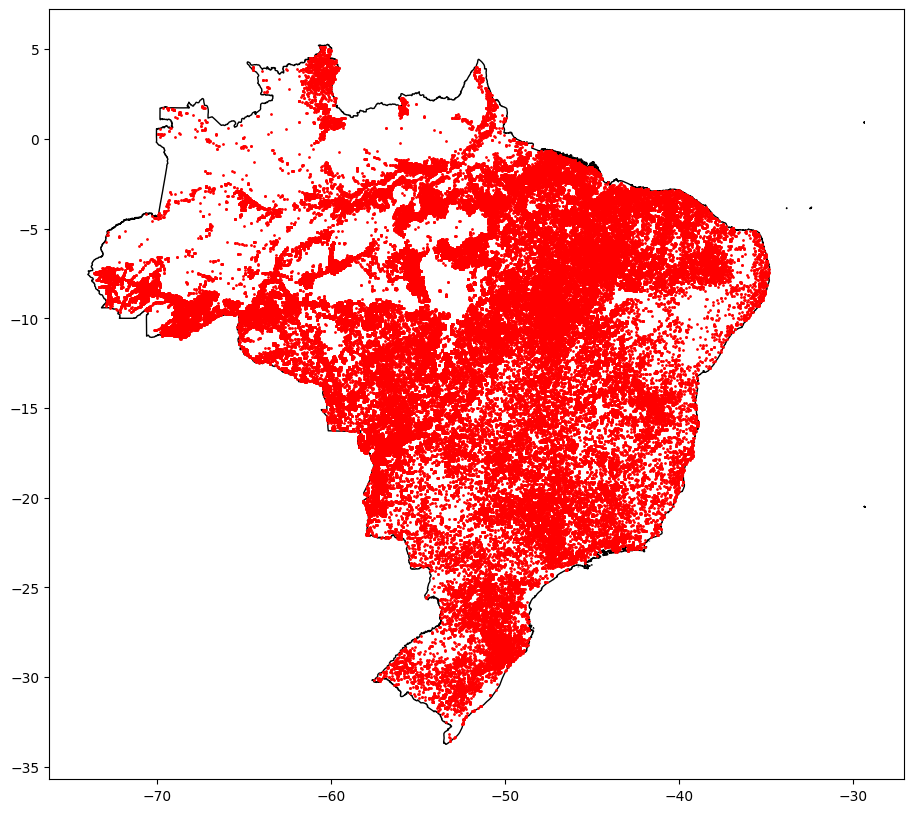

In [9]:
fig, ax = plt.subplots(figsize=(20,10))
brasil.plot(ax=ax, color='white', edgecolor='black')
focos_2020.plot(ax=ax, color='red', markersize=1)

In [ ]:
estados = gpd.read_file('../data/bcim.gpkg',
                        layer='lim_unidade_federacao_a')

In [ ]:
municipios = gpd.read_file('../data/bcim.gpkg',
                           layer='lim_municipio_a')

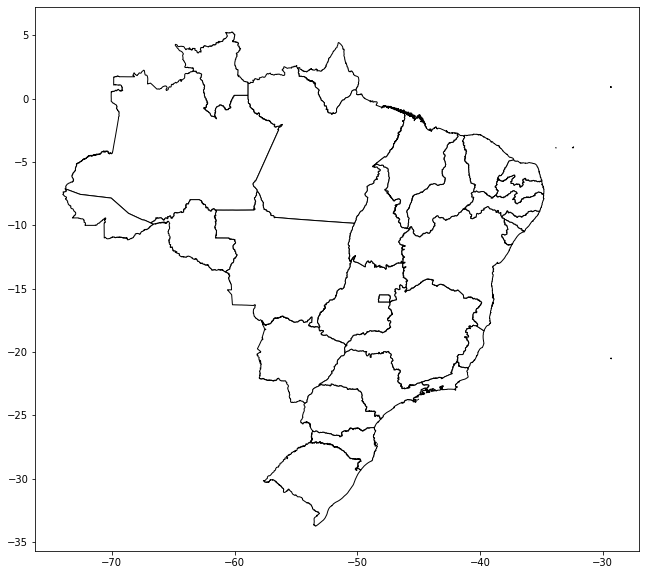

In [ ]:
estados.plot(figsize=(20,10), color='white', edgecolor='black')

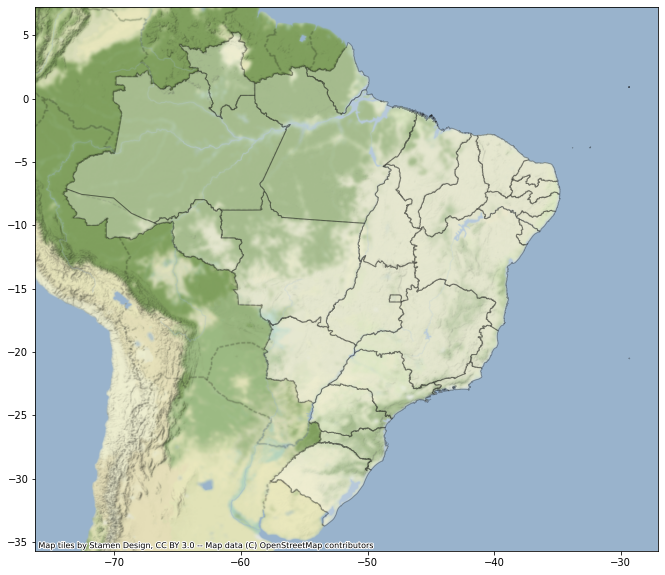

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
estados.plot(ax=ax, color='white', alpha=.3, edgecolor='black')
contextily.add_basemap(ax,
                       crs=estados.crs,
                      source=contextily.providers.Stamen.TerrainBackground
                      )

In [ ]:
estados.head()

nome  ...                                           geometry
0               Goiás  ...  MULTIPOLYGON (((-50.15876 -12.41581, -50.15743...
1  Mato Grosso do Sul  ...  MULTIPOLYGON (((-56.09815 -17.17220, -56.09159...
2              Paraná  ...  MULTIPOLYGON (((-52.08090 -22.52893, -52.04903...
3        Minas Gerais  ...  MULTIPOLYGON (((-44.21152 -14.22955, -44.20750...
4             Sergipe  ...  MULTIPOLYGON (((-38.00366 -9.51544, -38.00052 ...

[5 rows x 12 columns]

In [ ]:
estados.plot(figsize=(20,10), column='nome')

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
estados.plot(ax=ax, color='white', edgecolor='black')
focos_2020.plot(ax=ax, color='red', markersize=1)

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
estados.plot(ax=ax, color='white', edgecolor='black')
focos_2020.plot(ax=ax, column='bioma', markersize=1, legend=True)

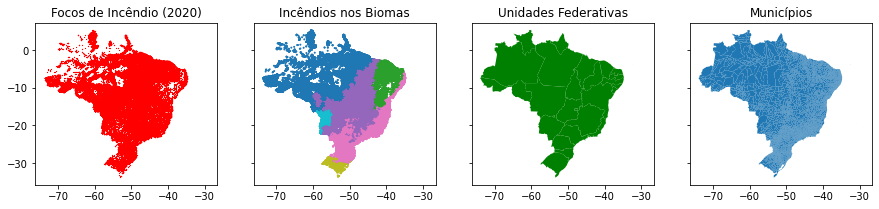

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, sharex=True, sharey=True, figsize=(15,15))

ax1.set_title(u'Focos de Incêndio (2020)')
ax2.set_title(u'Incêndios nos Biomas')
ax3.set_title('Unidades Federativas')
ax4.set_title(u'Municípios')

focos_2020.plot(ax=ax1,marker='*', color='red',markersize=0.1)
focos_2020.plot(ax=ax2, column='bioma', markersize=1)
estados.plot(ax=ax3,color='green')
municipios.plot(ax=ax4)

In [ ]:
pantanal = focos_2020.query('bioma == "Pantanal"')

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
estados.plot(ax=ax, color='white', edgecolor='black')
pantanal.plot(ax=ax, color='red', markersize=1)

In [ ]:
pantanal.shape

(22116, 13)

In [ ]:
pantanal.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
estados.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
pantanal = pantanal.to_crs('EPSG:4674')

In [ ]:
pantanal.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

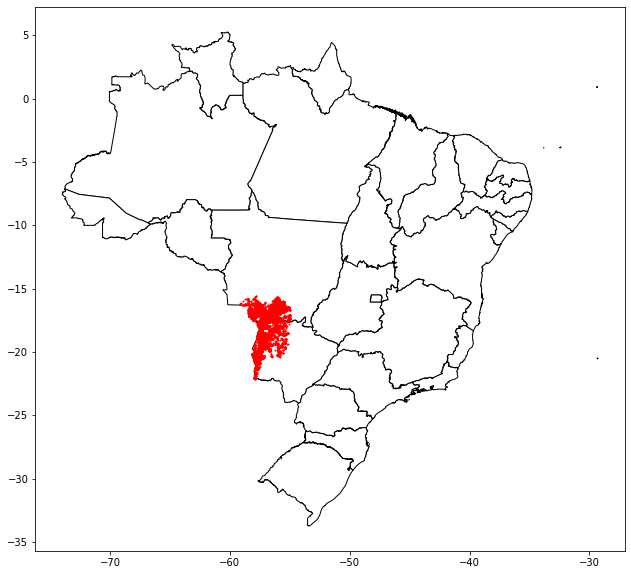

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
estados.plot(ax=ax, color='white', edgecolor='black')
pantanal.plot(ax=ax, color='red', markersize=1)

In [ ]:
corte_pantanal = gpd.sjoin(estados, pantanal)

In [ ]:
estados_foco_pantanal = corte_pantanal[['nome', 'geometry']].drop_duplicates()

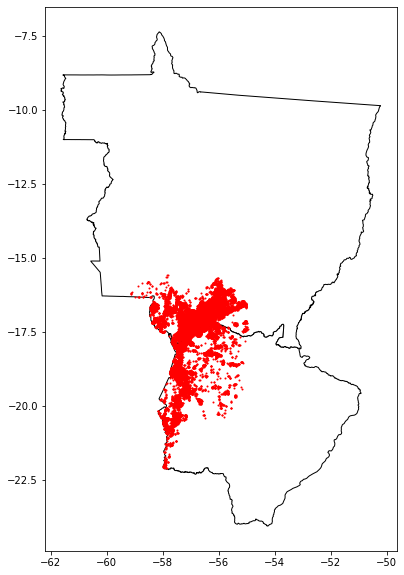

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
estados_foco_pantanal.plot(ax=ax, color='white', edgecolor='black')
pantanal.plot(ax=ax, color='red', markersize=1)

# Exercício

Filtre as queimadas no estado de SP e plote os focos de queimada. A cor deve ser em função do Bioma. Faça uso das funções de join espacial do geopandas.

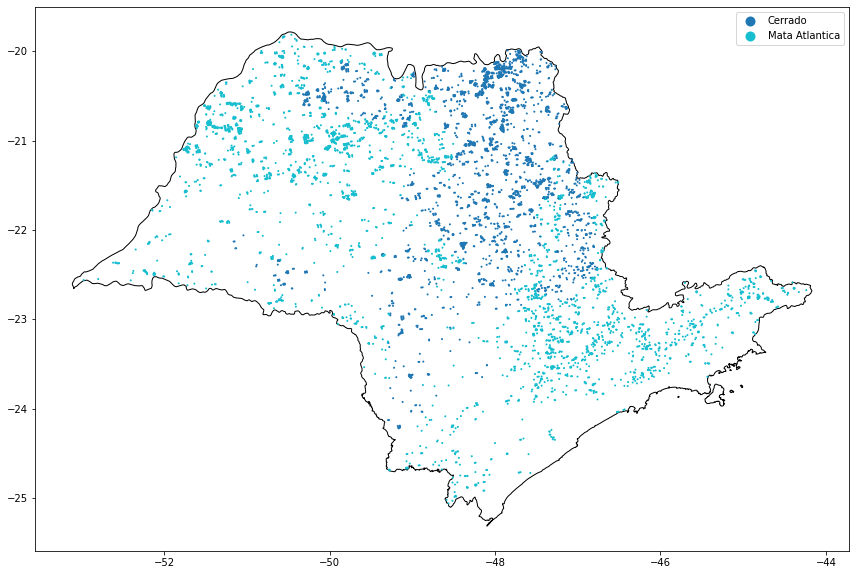

In [ ]:
# Resolução

SP  = estados.query('sigla == "SP" ')

corte_sp = gpd.sjoin(focos_2020.to_crs('EPSG:4674'), SP)

fig, ax = plt.subplots(figsize=(20,10))
SP.plot(ax=ax, color='white', edgecolor='black')
corte_sp.plot(ax=ax, column='bioma', markersize=1, legend=True)

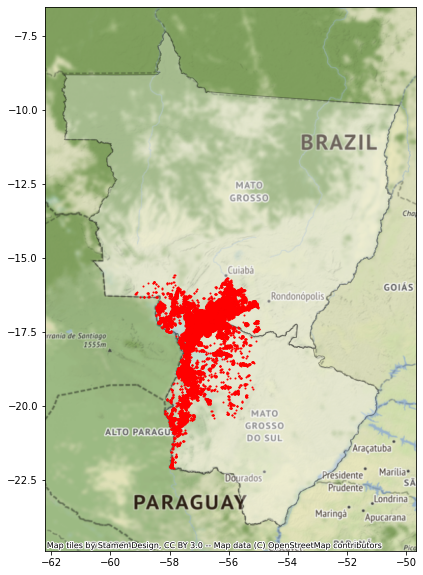

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
estados_foco_pantanal.plot(ax=ax, color='white', edgecolor='black', alpha=0.3)
pantanal.plot(ax=ax, color='red', markersize=1)
contextily.add_basemap(ax, crs=pantanal.crs.to_string())

In [ ]:
pantanal['datahora'] = pd.to_datetime(pantanal['datahora'], format='%Y/%m/%d %H:%M:%S')

In [ ]:
pantanal.head()

datahora  satelite  ...   frp                     geometry
6  2020-09-28 17:45:00  AQUA_M-T  ...  38.6  POINT (-56.87600 -17.30400)
9  2020-09-28 17:45:00  AQUA_M-T  ...  17.0  POINT (-57.44600 -18.01100)
11 2020-09-28 17:45:00  AQUA_M-T  ...   9.7  POINT (-57.23500 -17.97400)
12 2020-09-28 17:45:00  AQUA_M-T  ...  25.7  POINT (-57.59300 -17.96100)
13 2020-09-28 17:45:00  AQUA_M-T  ...  10.4  POINT (-57.38400 -17.95700)

[5 rows x 13 columns]

In [ ]:
nro_focos = pantaanal.groupby(pantanal.datahora.dt.month)[['bioma']].count()

In [ ]:
import calendar
novo_indice = map(lambda v : calendar.month_abbr[v], nro_focos.index)

In [ ]:
novo_indice = list(novo_indice)

In [ ]:
focos_2020_mes = pd.Series(data=nro_focos.values.ravel(), index=novo_indice)

In [ ]:
focos_2020_mes

Jan     265
Feb     164
Mar     602
Apr     784
May     313
Jun     406
Jul    1684
Aug    5935
Sep    8106
Oct    2856
Nov     778
Dec     223
dtype: int64

In [ ]:
ax  = focos_2020_mes.plot(kind="bar", legend=False, fontsize=20, figsize=(20,10));
ax.set_title("Focos Mensal - 2020", fontsize=36);
ax.set_xlabel("Mes", fontsize=24);
ax.set_ylabel("#Focos", fontsize=24);

In [ ]:
import folium

In [ ]:
mapa = folium.Map(location=[-15.788497,-47.879873],zoom_start=4)

In [ ]:
mapa

In [ ]:
from folium import plugins
mapa = folium.Map(location=[-15.788497,-47.879873],tiles='Stamen Toner',zoom_start=4)
coordenadas = []
for point in pantanal['geometry']:
    coordenadas.append(point.coords[0][::-1])


mapa.add_child(plugins.HeatMap(coordenadas))
mapa

In [ ]:
!pip install geoplot

  Using cached https://files.pythonhosted.org/packages/e1/8f/46133752e1f02e70501939e739b81cbc85c79d7398c963b8a25a3178bffe/geoplot-0.4.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/22/8e/d968c0945d41bb02de0efaa92e31e43a817dc52d30e82b4dfdda407a1903/mapclassify-2.4.2-py3-none-any.whl
     |████████████████████████████████| 14.4MB 290kB/s 
     |████████████████████████████████| 225kB 42.4MB/s 
  Created wheel for cartopy: filename=Cartopy-0.18.0-cp37-cp37m-linux_x86_64.whl size=15127698 sha256=08d351119c690b04347411b9cbedeeee7c05f0cd43dff3c780141a5c60ffba48
  Stored in directory: /root/.cache/pip/wheels/8d/f8/da/2c05136f2162370d2baec85bfbbf91d7729ab9e248da878acd
  Created wheel for pyshp: filename=pyshp-2.1.3-cp37-none-any.whl size=37264 sha256=110617501292dfcca26c52304e26130e0d120d18f53653de0e16305e8d09d06d
  Stored in directory: /root/.cache/pip/wheels/76/2b/d4/53e6b9a0fb0a9f9f29664cf82605af8bc81d5ab44d987896dd
Successfully built cartopy pyshp


In [ ]:
### PARA FAZER KDE PLOT

!pip uninstall -y shapely

!pip install shapely --no-binary shapely

Uninstalling Shapely-1.7.1:
  Successfully uninstalled Shapely-1.7.1


In [ ]:
import geoplot
import geoplot.crs as gcrs

In [ ]:
estados

nome  ...                                           geometry
0                 Goiás  ...  MULTIPOLYGON (((-50.15876 -12.41581, -50.15743...
1    Mato Grosso do Sul  ...  MULTIPOLYGON (((-56.09815 -17.17220, -56.09159...
2                Paraná  ...  MULTIPOLYGON (((-52.08090 -22.52893, -52.04903...
3          Minas Gerais  ...  MULTIPOLYGON (((-44.21152 -14.22955, -44.20750...
4               Sergipe  ...  MULTIPOLYGON (((-38.00366 -9.51544, -38.00052 ...
5               Alagoas  ...  MULTIPOLYGON (((-35.45878 -8.81780, -35.45898 ...
6             Tocantins  ...  MULTIPOLYGON (((-48.34644 -5.17871, -48.34311 ...
7               Roraima  ...  MULTIPOLYGON (((-60.17793 5.23024, -60.16619 5...
8              Amazonas  ...  MULTIPOLYGON (((-67.32285 2.04176, -67.29220 1...
9                  Acre  ...  MULTIPOLYGON (((-73.73811 -7.13471, -72.90246 ...
10             Rondônia  ...  MULTIPOLYGON (((-62.79892 -8.02312, -62.78622 ...
11     Distrito Federal  ...  MULTIPOLYGON (((-47.94846 -15.49916, -47.91366...
12                Piauí  ...  MULTIPOLYGON (((-41.73344 -2.81111, -41.73205 ...
13              Paraíba  ...  MULTIPOLYGON (((-37.21443 -6.03725, -37.20704 ...
14                Ceará  ...  MULTIPOLYGON (((-40.42389 -2.81130, -40.41525 ...
15       Santa Catarina  ...  MULTIPOLYGON (((-48.63761 -25.97490, -48.63504...
16       Rio de Janeiro  ...  MULTIPOLYGON (((-41.70343 -22.42014, -41.70380...
17                Amapá  ...  MULTIPOLYGON (((-51.18178 3.90573, -51.13631 3...
18                 Pará  ...  MULTIPOLYGON (((-46.25020 -1.13999, -46.25285 ...
19       Espírito Santo  ...  MULTIPOLYGON (((-40.47978 -17.91795, -40.46958...
20                Bahia  ...  MULTIPOLYGON (((-38.97119 -8.78270, -38.95972 ...
21          Mato Grosso  ...  MULTIPOLYGON (((-60.10041 -12.91271, -60.09773...
22           Pernambuco  ...  MULTIPOLYGON (((-32.38846 -3.81629, -32.39054 ...
23  Rio Grande do Norte  ...  MULTIPOLYGON (((-35.20267 -5.74677, -35.20324 ...
24             Maranhão  ...  MULTIPOLYGON (((-42.03760 -2.70322, -42.04097 ...
25            São Paulo  ...  MULTIPOLYGON (((-45.01051 -23.76176, -45.01624...
26    Rio Grande do Sul  ...  MULTIPOLYGON (((-53.03425 -27.15455, -53.03079...

[27 rows x 12 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


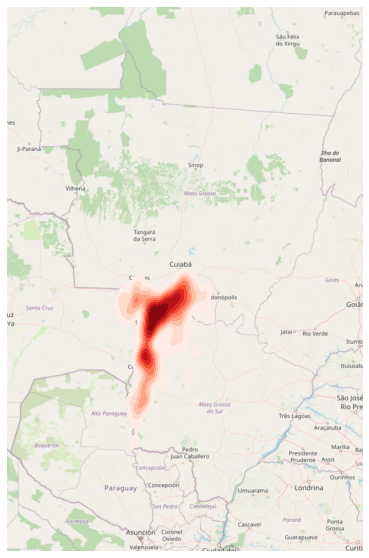

In [ ]:
ax = geoplot.kdeplot(pantanal,projection=gcrs.WebMercator(), cmap='Reds', shade=True,   figsize=(20, 10))
geoplot.webmap(estados_foco_pantanal, ax=ax)

# Spatial Analysis

In [ ]:
!pip install pysal

     |████████████████████████████████| 2.4MB 5.4MB/s 
     |████████████████████████████████| 112kB 19.0MB/s 
     |████████████████████████████████| 61kB 6.0MB/s 
     |████████████████████████████████| 61kB 5.9MB/s 
     |████████████████████████████████| 92kB 7.4MB/s 
     |████████████████████████████████| 51kB 5.1MB/s 
     |████████████████████████████████| 51kB 5.3MB/s 
     |████████████████████████████████| 215kB 18.6MB/s 
     |████████████████████████████████| 5.7MB 10.7MB/s 
     |████████████████████████████████| 61kB 5.9MB/s 
     |████████████████████████████████| 153kB 40.8MB/s 
     |████████████████████████████████| 235kB 43.2MB/s 
     |████████████████████████████████| 235kB 39.3MB/s 
     |████████████████████████████████| 56.4MB 79kB/s 
     |████████████████████████████████| 1.0MB 34.7MB/s 
     |████████████████████████████████| 1.0MB 34.4MB/s 
     |████████████████████████████████| 2.1MB 43.5MB/s 
     |████████████████████████████████| 19.1MB 52.5MB/s 
     

In [ ]:
!pip install splot

     |████████████████████████████████| 133kB 5.0MB/s 
ERROR: pysal 2.4.0 has requirement urllib3>=1.26, but you'll have urllib3 1.25.11 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: urllib3 1.26.4
    Uninstalling urllib3-1.26.4:
      Successfully uninstalled urllib3-1.26.4


In [ ]:
!pip install contextily

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from pysal.viz import splot
from splot.esda import plot_moran
import contextily
# Analysis
import geopandas as gpd
import pandas as pd
from pysal.explore import esda
from pysal.lib import weights
from numpy.random import seed


/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [ ]:
!wget https://geographicdata.science/book/_downloads/3c5d077df052a9a21915c1a938536f99/brexit_vote.csv

--2021-04-19 20:42:47--  https://geographicdata.science/book/_downloads/3c5d077df052a9a21915c1a938536f99/brexit_vote.csv
Resolving geographicdata.science (geographicdata.science)... 185.199.109.153, 185.199.111.153, 185.199.110.153, ...
Connecting to geographicdata.science (geographicdata.science)|185.199.109.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48293 (47K) [text/csv]
Saving to: ‘brexit_vote.csv’

brexit_vote.csv     100%[===================>]  47.16K  --.-KB/s    in 0.01s   

2021-04-19 20:42:47 (3.94 MB/s) - ‘brexit_vote.csv’ saved [48293/48293]



In [ ]:
!wget https://geographicdata.science/book/_downloads/860cf1380fe6cb15c80f882fad461a04/local_authority_districts.geojson

--2021-04-19 20:42:47--  https://geographicdata.science/book/_downloads/860cf1380fe6cb15c80f882fad461a04/local_authority_districts.geojson
Resolving geographicdata.science (geographicdata.science)... 185.199.109.153, 185.199.111.153, 185.199.110.153, ...
Connecting to geographicdata.science (geographicdata.science)|185.199.109.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1478332 (1.4M) [application/geo+json]
Saving to: ‘local_authority_districts.geojson’

local_authority_dis 100%[===================>]   1.41M  --.-KB/s    in 0.09s   

2021-04-19 20:42:48 (15.3 MB/s) - ‘local_authority_districts.geojson’ saved [1478332/1478332]



In [ ]:
!ls

brexit_vote.csv  local_authority_districts.geojson  sample_data


In [ ]:
ref = pd.read_csv('brexit_vote.csv', index_col='Area_Code')

In [ ]:
ref

id Region_Code  ... Pct_Leave Pct_Rejected
Area_Code                   ...                       
E06000031  108   E12000006  ...     60.89         0.09
E06000032  109   E12000006  ...     56.55         0.16
E06000033  112   E12000006  ...     58.08         0.07
E06000034  113   E12000006  ...     72.28         0.04
E06000055  110   E12000006  ...     51.78         0.08
...        ...         ...  ...       ...          ...
E08000032   65   E12000003  ...     54.23         0.10
E08000033   66   E12000003  ...     55.68         0.07
E08000034   67   E12000003  ...     54.67         0.09
E08000035   68   E12000003  ...     49.69         0.09
E08000036   69   E12000003  ...     66.36         0.06

[382 rows x 20 columns]

In [ ]:
lads = gpd.read_file('local_authority_districts.geojson').set_index('lad16cd')

In [ ]:
lads.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 391 entries, E06000001 to W06000023
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   objectid    391 non-null    int64   
 1   lad16nm     391 non-null    object  
 2   lad16nmw    22 non-null     object  
 3   bng_e       391 non-null    int64   
 4   bng_n       391 non-null    int64   
 5   long        391 non-null    float64 
 6   lat         391 non-null    float64 
 7   st_areasha  391 non-null    float64 
 8   st_lengths  391 non-null    float64 
 9   geometry    391 non-null    geometry
dtypes: float64(4), geometry(1), int64(3), object(2)
memory usage: 33.6+ KB


In [ ]:
lads

objectid  ...                                           geometry
lad16cd              ...                                                   
E06000001         1  ...  MULTIPOLYGON (((-1.27024 54.72716, -1.38088 54...
E06000002         2  ...  MULTIPOLYGON (((-1.23001 54.58410, -1.28158 54...
E06000003         3  ...  MULTIPOLYGON (((-1.13716 54.64693, -1.13256 54...
E06000004         4  ...  MULTIPOLYGON (((-1.31774 54.64524, -1.38088 54...
E06000010        10  ...  MULTIPOLYGON (((-0.31613 53.81325, -0.35366 53...
...             ...  ...                                                ...
W06000018       385  ...  POLYGON ((-3.30131 51.79897, -3.31009 51.79430...
W06000019       386  ...  POLYGON ((-3.24823 51.81515, -3.31009 51.79430...
W06000021       388  ...  MULTIPOLYGON (((-3.05214 51.97294, -3.06736 51...
W06000022       389  ...  MULTIPOLYGON (((-2.83439 51.64824, -2.88647 51...
W06000023       390  ...  POLYGON ((-3.15484 52.89808, -3.23300 52.86699...

[391 rows x 10 columns]

In [ ]:
db = gpd.GeoDataFrame(

    lads.join(ref[['Pct_Leave']]), crs = lads.crs).to_crs(epsg=3857)[['objectid', 'lad16nm',
                                                                      'Pct_Leave', 'geometry']].dropna()

In [ ]:
db

objectid  ...                                           geometry
lad16cd              ...                                                   
E06000001         1  ...  MULTIPOLYGON (((-141402.215 7309092.065, -1537...
E06000002         2  ...  MULTIPOLYGON (((-136924.099 7281563.141, -1426...
E06000003         3  ...  MULTIPOLYGON (((-126588.382 7293641.928, -1260...
E06000004         4  ...  MULTIPOLYGON (((-146690.634 7293316.144, -1537...
E06000010        10  ...  MULTIPOLYGON (((-35191.009 7134866.244, -39368...
...             ...  ...                                                ...
W06000018       385  ...  POLYGON ((-367500.093 6763858.294, -368477.326...
W06000019       386  ...  POLYGON ((-361591.484 6766770.434, -368477.326...
W06000021       388  ...  MULTIPOLYGON (((-339763.135 6795234.133, -3414...
W06000022       389  ...  MULTIPOLYGON (((-315522.423 6736770.650, -3213...
W06000023       390  ...  POLYGON ((-351195.487 6964167.570, -359895.527...

[380 rows x 4 columns]

In [ ]:
f, ax = plt.subplots(1, figsize=(20,10))
db.plot(column = 'Pct_Leave',
        cmap = 'viridis',
        scheme = 'quantiles',
        k = 5,
        edgecolor = 'white',
        linewidth=0.,
        alpha=0.75,
        legend=True,
        legend_kwds={'loc':2},
        ax = ax)

contextily.add_basemap(ax,
                       crs=db.crs,
                       source=contextily.providers.Stamen.TerrainBackground
                      )
ax.set_axis_off()

In [ ]:
w = weights.KNN.from_dataframe(db, k=8 )

In [ ]:
print(w)

In [ ]:
w.transform = 'R'

In [ ]:
qW = weights.Queen.from_dataframe(db)

/usr/local/lib/python3.7/dist-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 7 disconnected components.
 There are 6 islands with ids: 46, 52, 331, 339, 342, 358.
  warnings.warn(message)


In [ ]:
qW.transform = 'R'

('WARNING: ', 46, ' is an island (no neighbors)')
('WARNING: ', 52, ' is an island (no neighbors)')
('WARNING: ', 331, ' is an island (no neighbors)')
('WARNING: ', 339, ' is an island (no neighbors)')
('WARNING: ', 342, ' is an island (no neighbors)')
('WARNING: ', 358, ' is an island (no neighbors)')


In [ ]:
qW[3]

{0: 0.2, 1: 0.2, 7: 0.2, 47: 0.2, 206: 0.2}

In [ ]:
db['Pct_Leave_lag'] = weights.spatial_lag.
lag_spatial(w, db['Pct_Leave'])

In [ ]:
db.loc[['E08000012', 'S12000019'],
       ['Pct_Leave', 'Pct_Leave_lag']]

Pct_Leave  Pct_Leave_lag
lad16cd                            
E08000012      41.81       54.61375
S12000019      37.94       38.01875

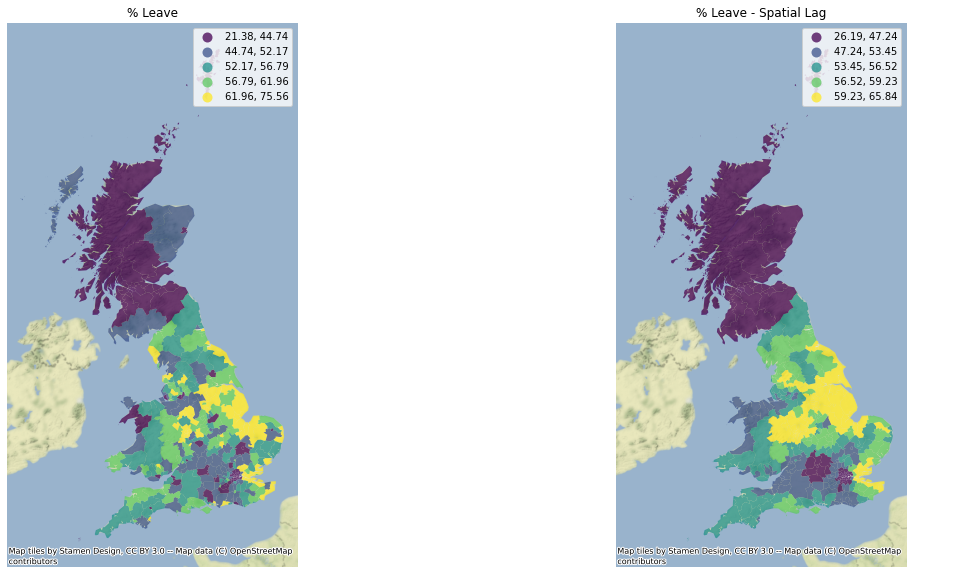

In [ ]:
f, axs = plt.subplots(1, 2, figsize=(20,10))
ax1, ax2 = axs

db.plot(column='Pct_Leave', cmap = 'viridis', scheme='quantiles', k = 5,
        edgecolor='white', linewidth=0.0, alpha=0.75, legend=True, ax=ax1)
ax1.set_axis_off()
ax1.set_title('% Leave')
contextily.add_basemap(ax1,
                       crs=db.crs,
                       source=contextily.providers.Stamen.TerrainBackground,

                      )

db.plot(column='Pct_Leave_lag', cmap='viridis', scheme='quantiles',
        k=5, edgecolor='white', linewidth=0., alpha=0.75, legend=True, ax=ax2)
ax2.set_axis_off()
ax2.set_title("% Leave - Spatial Lag")
contextily.add_basemap(ax2,
                       crs=db.crs,
                       source=contextily.providers.Stamen.TerrainBackground,

                      )

plt.show()

# Moran I

In [ ]:
from esda.moran import Moran


In [ ]:
moran = Moran(db['Pct_Leave'], w)
moran.I


0.6454521298096587

In [ ]:
from splot.esda import moran_scatterplot

In [ ]:
fig, ax = moran_scatterplot(moran, aspect_equal=True)
plt.show()


In [ ]:
from splot.esda import plot_moran

plot_moran(moran, zstandard=True, figsize=(10,4))
plt.show()

In [ ]:
moran.p_sim

0.001

In [ ]:
from esda.moran import Moran_Local
moran_loc = Moran_Local(db['Pct_Leave'], w)

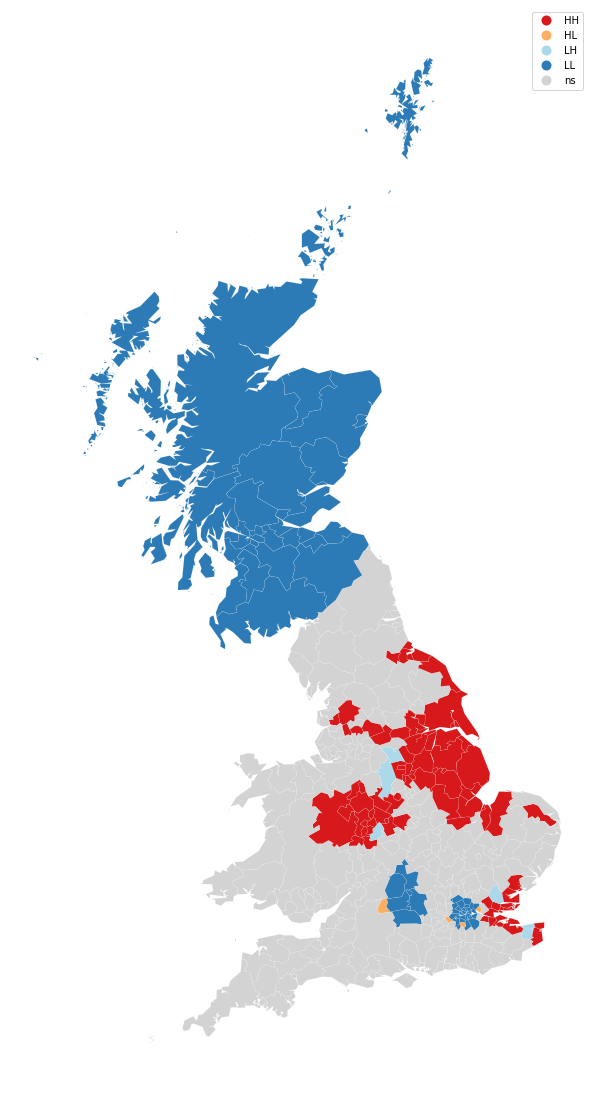

In [ ]:
from splot.esda import lisa_cluster

lisa_cluster(moran_loc, db, p=0.05, figsize = (20,20))
plt.show()

In [ ]:
from splot.esda import plot_local_autocorrelation
plot_local_autocorrelation(moran_loc, db,
                           'Pct_Leave')
plt.show()

In [ ]:
db['Pct_Leave_std'] = ( db['Pct_Leave'] - db['Pct_Leave'].mean() )\
                    / db['Pct_Leave'].std()
db['Pct_Leave_lag_std'] = ( db['Pct_Leave_lag'] - db['Pct_Leave_lag'].mean() )\
                    / db['Pct_Leave_lag'].std()

In [ ]:
f, ax = plt.subplots(1, figsize=(6, 6))
sns.regplot(x='Pct_Leave_std', y='Pct_Leave_lag_std',
                ci=None, data=db, line_kws={'color':'r'})
ax.axvline(0, c='k', alpha=0.5)
ax.axhline(0, c='k', alpha=0.5)
ax.set_title('Moran Plot - % Leave')
plt.show()

# Join counts

In [ ]:
db['Leave'] = (db['Pct_Leave'] > 50).astype(int)
db[['Pct_Leave', 'Leave']].tail()

Pct_Leave  Leave
lad16cd                    
W06000018      57.63      1
W06000019      62.03      1
W06000021      49.56      0
W06000022      55.99      1
W06000023      53.74      1

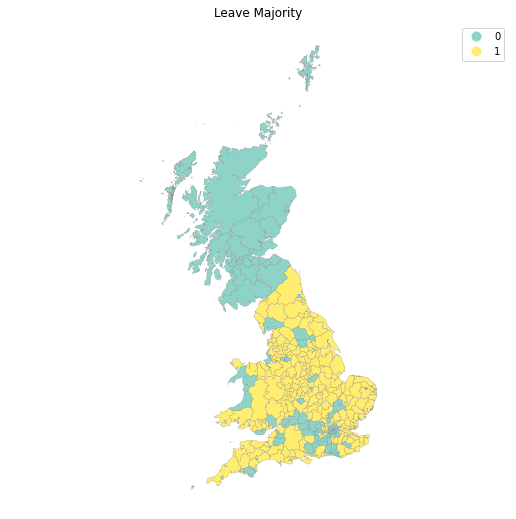

In [ ]:
f, ax = plt.subplots(1, figsize=(9, 9))
db.plot(ax=ax, column='Leave', categorical=True, legend=True,
        edgecolor='0.5', linewidth=0.25, cmap='Set3',
        figsize=(9, 9));
ax.set_axis_off()
ax.set_title('Leave Majority')
plt.axis('equal')
plt.show()

In [ ]:
w.transform

'R'

In [ ]:
w.transform = 'O'

In [ ]:
w.transform

'O'

In [ ]:
seed(1234)

In [ ]:
jc = esda.join_counts.Join_Counts(db['Leave'], w)

In [ ]:
jc

In [ ]:
jc.bb

871.0

In [ ]:
jc.ww

302.0

In [ ]:
jc.bw

347.0

In [ ]:
jc.bb + jc.ww + jc.bw

1520.0

In [ ]:
jc.J

1520.0

In [ ]:
jc.mean_bb

727.4124124124124

In [ ]:
jc.mean_bw

649.3233233233233

In [ ]:
jc.p_sim_bb

0.001

In [ ]:
jc.p_sim_bw

1.0

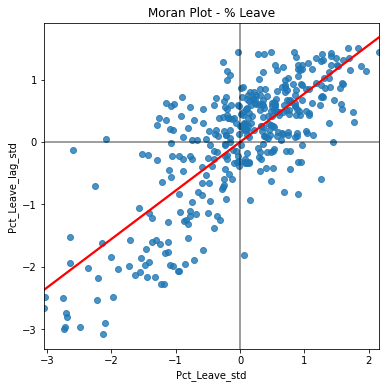